In [1]:
# load up modules
import pandas as pd
import numpy as np

# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
#loading the training dataset
df = pd.read_csv('/Users/danlee0448/Desktop/NUMSDS/MSDS422/module_1/kaggle/dataset/train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# create a dictionary for sex

gender = {'male' : 1, 'female' : 2}
df['sex'] = df['Sex'].map(gender)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S,2
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S,1
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S,2
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [10]:
df['sex'] = df.sex.astype(float)

,Survived,sex,Pclass,Age
Survived,1.000000,0.543351,-0.338481,-0.077221
sex,0.543351,1.000000,-0.131900,-0.093254
Pclass,-0.338481,-0.131900,1.000000,-0.369226
Age,-0.077221,-0.093254,-0.369226,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

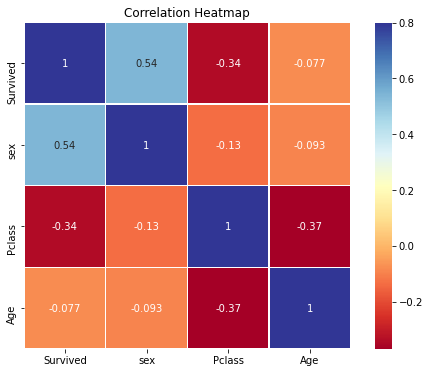

In [11]:
#Setting a correlation map to see if sex, ticket class, and age correlates with survival. 

# setting the columns to correlate
columns = ['Survived','sex','Pclass','Age']
df_corr = df[columns]

# running the correlation
df_corr.corr()

# setting up the heatmap
corrmat = df_corr.corr()

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5 )
plt.title('Correlation Heatmap')



In [28]:
#based on the heatmap, sex and class seem to have a relationship with passenger survival. 
#We can dig into these more, starting with sex. 

df_s = df[df['Survived']==1]
df_ns = df[df["Survived"]==0]

In [47]:
#graph above shows that higher ticket class survived more than lower ticket classes. 

sex_s = df_s['Sex'].value_counts()
sex_ns = df_ns['Sex'].value_counts()
df_sex = pd.concat([sex_s, sex_ns], axis=1)
df_sex.columns = ['Survived', 'Not_Survived']
df_sex["Sex"] = df_sex.index
df_sex

,Survived,Not_Survived,Sex
female,233,81,female
male,109,468,male


<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x7ff2bc951520>,
 [Text(0, 0, 'female'), Text(0, 0, 'male')])

Text(0.5, 0, 'sex')

Text(0, 0.5, 'count of individuals')

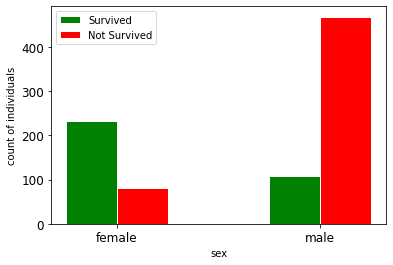

In [49]:
#showing the results from above below in a bar graph

width = 0.25
n = 2
plt.bar(np.arange(n), df_sex["Survived"], width, label ="Survived", color="green", edgecolor="white")
plt.bar(np.arange(n)+ width, df_sex["Not_Survived"], width, label="Not Survived", color="red", edgecolor="white")
plt.xticks(np.arange(n)+width/2, df_sex["Sex"] )
plt.xlabel("sex")
plt.ylabel("count of individuals")
plt.legend(loc="best")
plt.show()

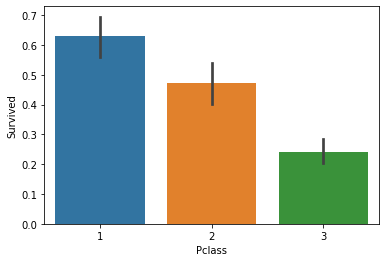

In [29]:
#next we dig into class
sns.barplot(x='Pclass', y='Survived', data=df);

In [46]:
class_s = df_s['Pclass'].value_counts()
class_ns = df_ns['Pclass'].value_counts()
df_class = pd.concat([class_s, class_ns], axis=1)
df_class.columns = ['Survived', 'Not_Survived']
df_class["Pclass"] = df_class.index
df_class

,Survived,Not_Survived,Pclass
1,136,80,1
2,87,97,2
3,119,372,3


<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7ff2bcaf0880>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

Text(0.5, 0, 'ticket class')

Text(0, 0.5, 'count of individuals')

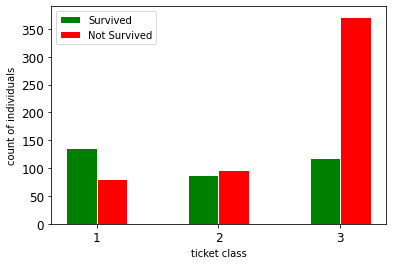

In [51]:
#showing the results from above below in a bar graph

width = 0.25
n = 3
plt.bar(np.arange(n), df_class["Survived"], width, label ="Survived", color="green", edgecolor="white")
plt.bar(np.arange(n)+ width, df_class["Not_Survived"], width, label="Not Survived", color="red", edgecolor="white")
plt.xticks(np.arange(n)+width/2, df_class["Pclass"] )
plt.xlabel("ticket class")
plt.ylabel("count of individuals")
plt.legend(loc="best")
plt.show()